In [8]:
# problems.db 에서 데이터 가져오기

import sqlalchemy
from sqlalchemy import create_engine

from sqlalchemy.orm import sessionmaker
from sqlalchemy.ext.declarative import declarative_base

from solved_scraper.entity import Problems, Users, UserProblem

# DB 연결
engine = create_engine('sqlite:///problems.db', echo=True)
Session = sessionmaker(bind=engine)
session = Session()

# Base = declarative_base()
# Base.metadata.create_all(engine)

# 문제 가져오기
def get_problems():
    problems = session.query(Problems).all()
    return problems

def get_users():
    users = session.query(Users).all()
    return users

def get_interaction():
    interaction = session.query(UserProblem).all()
    return interaction


problems = get_problems()
users = get_users()
interaction = get_interaction()

2025-04-09 00:40:22,558 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-04-09 00:40:22,559 INFO sqlalchemy.engine.Engine SELECT problems.id AS problems_id, problems.problem_id AS problems_problem_id, problems.title AS problems_title, problems.is_solvable AS problems_is_solvable, problems.accepted_user_count AS problems_accepted_user_count, problems.level AS problems_level, problems.average_tries AS problems_average_tries, problems.tags AS problems_tags 
FROM problems
2025-04-09 00:40:22,559 INFO sqlalchemy.engine.Engine [generated in 0.00057s] ()
2025-04-09 00:40:22,686 INFO sqlalchemy.engine.Engine SELECT users.id AS users_id, users.handle AS users_handle, users.solved_count AS users_solved_count, users.user_class AS users_user_class, users.tier AS users_tier, users.rating AS users_rating, users.rating_by_problems_sum AS users_rating_by_problems_sum, users.rating_by_class AS users_rating_by_class, users.rating_by_solved_count AS users_rating_by_solved_count, users.rival_count AS u

In [10]:
# dataFrame 만들기
import pandas as pd

# class Problems(Base):
#     __tablename__ = "problems"
#     id = Column(Integer, primary_key=True, autoincrement=True)
#     problem_id = Column(Integer, unique=True, nullable=False)
#     title = Column(String, nullable=False)
#     is_solvable = Column(Boolean)
#     accepted_user_count = Column(Integer)
#     level = Column(Integer)
#     average_tries = Column(Integer)
#     tags = Column(String)

def get_dataframe(problems):
    data = []
    for problem in problems:
        data.append({
            'problem_id': problem.problem_id,
            'title': problem.title,
            'is_solvable': problem.is_solvable,
            'accepted_user_count': problem.accepted_user_count,
            'level': problem.level,
            'average_tries': problem.average_tries,
            'tags': problem.tags
        })
    df = pd.DataFrame(data)
    return df

problems_df = get_dataframe(problems)

In [11]:

# class Users(Base):
#     __tablename__ = "users"
#     id = Column(Integer, primary_key=True, autoincrement=True, index=True)
#     handle = Column(String(255), unique=True, index=True)
#     solved_count = Column(Integer)
#     user_class = Column(Integer)
#     tier = Column(Integer)
#     rating = Column(Integer)
#     rating_by_problems_sum = Column(Integer)
#     rating_by_class = Column(Integer)
#     rating_by_solved_count = Column(Integer)
#     rival_count = Column(Integer)
#     reverse_rival_count = Column(Integer)
#     max_streak = Column(Integer)
#     rank = Column(Integer)
#     organization = Column(String(2048), nullable=True)  # 길이 줄임

def get_users_dataframe(users):
    data = []
    for user in users:
        data.append({
            'handle': user.handle,
            'solved_count': user.solved_count,
            'user_class': user.user_class,
            'tier': user.tier,
            'rating': user.rating,
            'rating_by_problems_sum': user.rating_by_problems_sum,
            'rating_by_class': user.rating_by_class,
            'rating_by_solved_count': user.rating_by_solved_count,
            'rival_count': user.rival_count,
            'reverse_rival_count': user.reverse_rival_count,
            'max_streak': user.max_streak,
            'rank': user.rank,
            'organization': user.organization
        })
    df = pd.DataFrame(data)
    return df

users_df = get_users_dataframe(users)

In [12]:
problems_df.head()

,problem_id,title,is_solvable,accepted_user_count,level,average_tries,tags
0,1000,A+B,True,335640,1,2,"implementation,arithmetic,math"
1,1001,A-B,True,288551,1,1,"implementation,arithmetic,math"
2,1002,터렛,True,41102,8,4,"case_work,geometry,math"
3,1003,피보나치 함수,True,62358,8,2,dp
4,1004,어린 왕자,True,17616,8,2,"geometry,math"


In [13]:
users_df.head()

,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,rival_count,reverse_rival_count,max_streak,rank,organization
0,koosaga,13742,10,31,3315,2865,250,175,5,376,24,1,None
1,cki86201,6861,10,31,3228,2778,250,175,0,58,38,2,None
2,ainta,4765,10,31,3218,2768,250,175,0,31,4,3,None
3,mitnegativeinfinity,2966,10,31,3212,2762,250,175,2,28,8,4,None
4,world_vanquisher,693,10,31,3194,2749,250,170,10,12,10,5,None


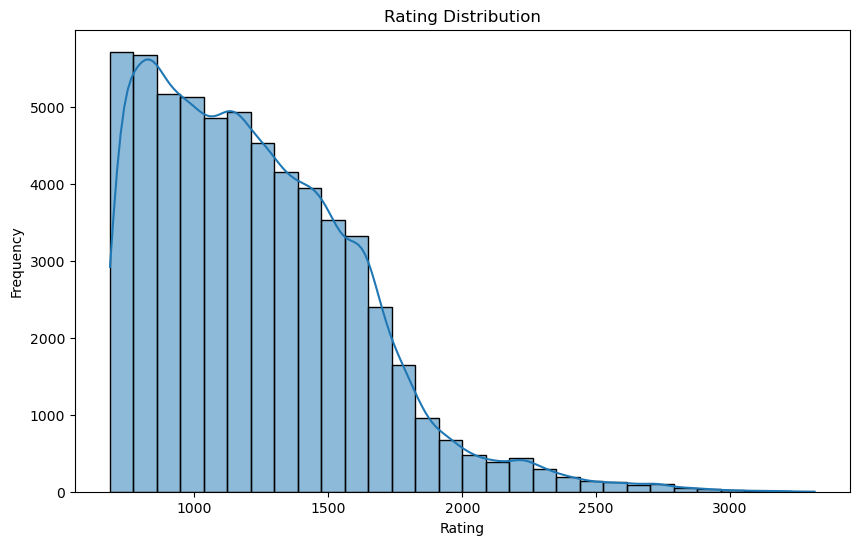

In [14]:
# rating 분포 보기
import matplotlib.pyplot as plt
import seaborn as sns

def plot_rating_distribution(users_df):
    plt.figure(figsize=(10, 6))
    sns.histplot(users_df['rating'], bins=30, kde=True)
    plt.title('Rating Distribution')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()
    
plot_rating_distribution(users_df)

In [15]:
import pandas as pd

interaction_df = pd.DataFrame([{
    'user_id': i.user_id,
    'problem_id': i.problem_id,
} for i in interaction])
interaction_df.head()

,user_id,problem_id
0,5,1
1,5,2
2,5,9
3,5,38
4,5,68


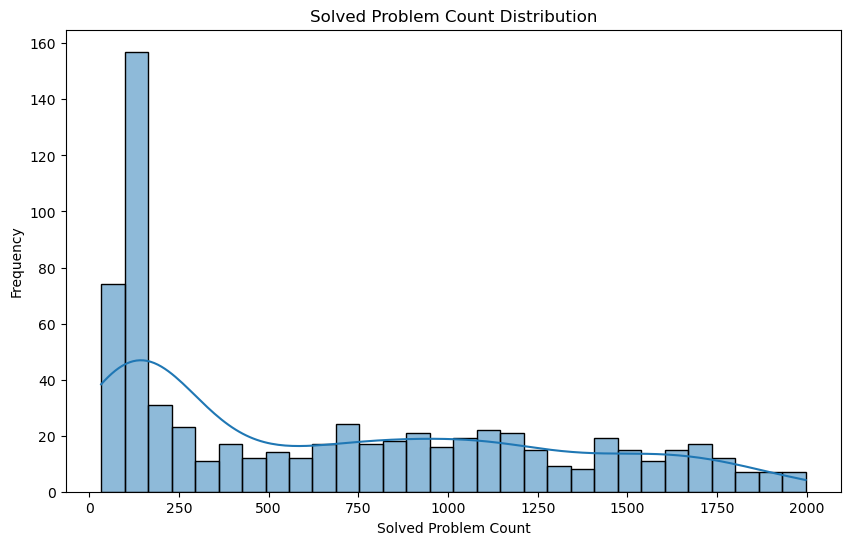

In [17]:
# 각 user가 푼 문제 개수 plot
def plot_solved_problem_count(interaction_df):
    plt.figure(figsize=(10, 6))
    sns.histplot(interaction_df['user_id'].value_counts(), bins=30, kde=True)
    plt.title('Solved Problem Count Distribution')
    plt.xlabel('Solved Problem Count')
    plt.ylabel('Frequency')
    plt.show()
plot_solved_problem_count(interaction_df)

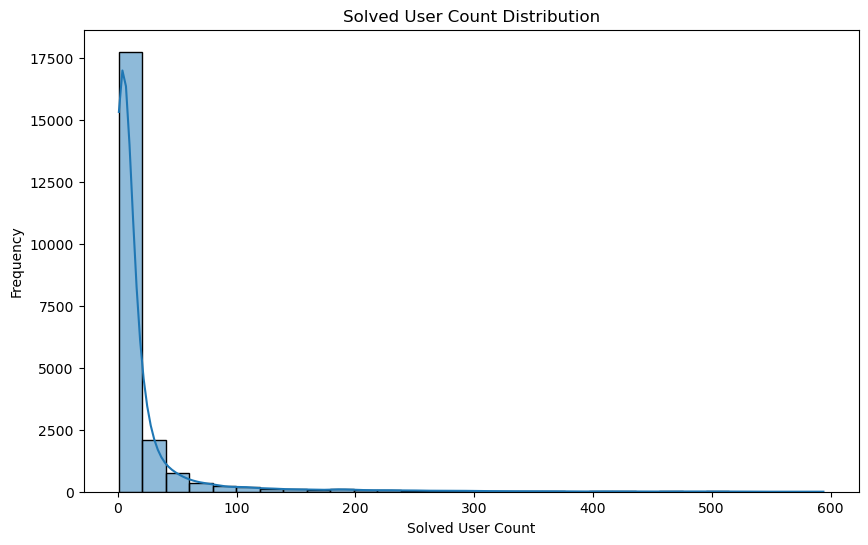

In [18]:
# 각 문제마다 푼 사람 수 plot
def plot_solved_user_count(interaction_df):
    plt.figure(figsize=(10, 6))
    sns.histplot(interaction_df['problem_id'].value_counts(), bins=30, kde=True)
    plt.title('Solved User Count Distribution')
    plt.xlabel('Solved User Count')
    plt.ylabel('Frequency')
    plt.show()
plot_solved_user_count(interaction_df)